# Nueva visualización

- Óscar Alvarado

In [220]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

Se encontró un mejor dataset hecho apenas hasta el 30 de abril en la página:

https://www.kaggle.com/mariotormo/complete-pokemon-dataset-updated-090420

In [200]:
df_completo = pd.read_csv('../datos/complete-pokemon-dataset-updated-300420/pokedex_(Update_05.20).csv')
#df_completo.set_index('pokedex_number', inplace = True)
df_completo.drop(['Unnamed: 0', 'german_name', 'japanese_name', 'egg_type_2', 'egg_type_number',
                  'egg_type_1', 'egg_cycles'], inplace = True, axis = 1)
df_completo.rename(columns = {'pokedex_number':'Número_pokedex','name':'Nombre', 'generation':'Generación', 
          'status':'Clasificación','species':'Especie','type_number':'Número_de_tipos','type_1':'Primer_tipo',
          'type_2':'Segundo_tipo','height_m':'Altura_m','weight_kg':'Peso_kg',
          'abilities_number':'#_de_habilidades','ability_1':'Habilidad_1','ability_2':'Habilidad_2',
          'ability_hidden':'Habilidad_oculta','total_points':'Puntos_totales','hp':'Vida','attack':'Ataque',
          'defense':'Defensa','sp_attack':'Ataque_especial','sp_defense':'Defensa_especial','speed':'Velocidad',
          'catch_rate':'Tasa_de_captura','base_friendship':'Amistad_base','base_experience':'Experiencia_base',
          'growth_rate':'Tasa_de_crecimiento','percentage_male':'Porcentaje_macho', 
          'against_normal':'Contra_normal','against_fire':'Contra_fuego','against_water':'Contra_agua',
          'against_electric':'Contra_eléctrico','against_grass':'Contra_planta','against_ice':'Contra_hielo',
          'against_fight':'Contra_luchador','against_poison':'Contra_posión','against_ground':'Contra_tierra',
          'against_flying':'Contra_volador','against_psychic':'Contra_psíquico','against_bug':'Contra_bicho',
          'against_rock':'Contra_roca','against_ghost':'Contra_fantasma','against_dragon':'Contra_dragón',
          'against_dark':'Contra_oscuridad','against_steel':'Contra_acero','against_fairy':'Contra_hada'}, 
            inplace = True)
# Remplazo de lo que se pueda cambiar de inglés a español:
tipos = dict(zip(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison', 'Electric', 'Ground', 'Ice', 
                  'Fairy', 'Steel', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying'], 
        ['Agua', 'Normal', 'Planta', 'Bicho', 'Fuego', 'Psíquico', 'Roca', 'Eléctrico', 'Tierra', 'Oscuridad', 
         'Posión', 'Lucha', 'Dragón', 'Fantasma', 'Acero', 'Hielo', 'Hada', 'Volador']))
clasificación = dict(zip(['Sub Legendary', 'Legendary', 'Mythical'], 
                         ['Semi_Legendario', 'Legendario', 'Mítico']))
columnas = ['Primer_tipo', 'Segundo_tipo', 'Clasificación']
labels = [tipos, tipos, clasificación]
for idx, columna in enumerate(columnas):
    df_completo[columna].replace(to_replace = labels[idx], value = None, inplace = True)
df_completo.tail()

,Número_pokedex,Nombre,Generación,Clasificación,Especie,Número_de_tipos,Primer_tipo,Segundo_tipo,Altura_m,Peso_kg,...,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero,Contra_hada
1023,888,Zacian Hero of Many Battles,8,Legendario,Warrior Pokémon,1,Posión,NaN,2.8,110.0,...,1.0,1.0,1.0,0.50,1.00,1.0,0.0,0.5,2.0,1.0
1024,889,Zamazenta Crowned Shield,8,Legendario,Warrior Pokémon,2,Dragón,Lucha,2.9,785.0,...,2.0,1.0,1.0,0.25,0.25,1.0,0.5,0.5,0.5,1.0
1025,889,Zamazenta Hero of Many Battles,8,Legendario,Warrior Pokémon,1,Dragón,NaN,2.9,210.0,...,1.0,2.0,2.0,0.50,0.50,1.0,1.0,0.5,1.0,2.0
1026,890,Eternatus,8,Legendario,Gigantic Pokémon,2,Roca,Hada,20.0,950.0,...,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0
1027,890,Eternatus Eternamax,8,Legendario,Gigantic Pokémon,2,Roca,Hada,100.0,NaN,...,2.0,1.0,2.0,0.50,1.00,1.0,2.0,1.0,1.0,1.0


## Datos faltantes

In [201]:
faltantes = df_completo.isna().sum()
faltantes = faltantes[faltantes != 0]
faltantes['Otros'] = 0
faltantes.sort_values(ascending = False, inplace = True)
faltantes

Habilidad_2            515
Segundo_tipo           486
Porcentaje_macho       236
Habilidad_oculta       218
Experiencia_base       104
Amistad_base           104
Tasa_de_captura        104
Habilidad_1              3
Tasa_de_crecimiento      1
Peso_kg                  1
Otros                    0
dtype: int64

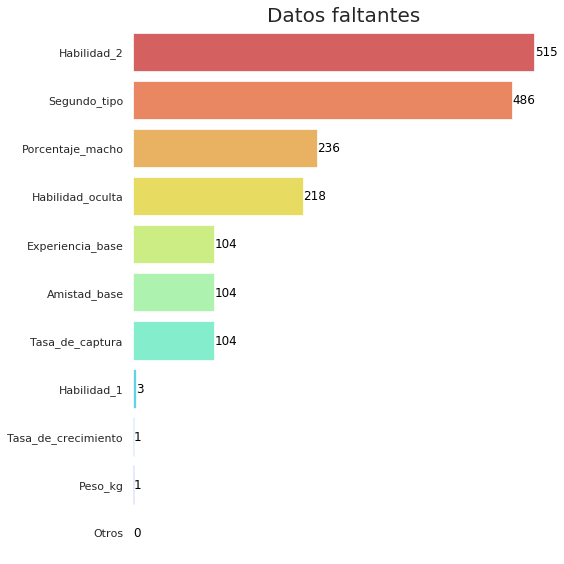

In [222]:
#colors1 = sns.color_palette('Set1')
colors1 = 'jet_r'

fig, ax = plt.subplots(figsize = (8,8))
graf = sns.barplot(ax = ax, y = list(faltantes.axes[0]), x = list(faltantes.values), alpha = 0.7, 
                   palette = colors1)
for idx, valor in enumerate(faltantes.iteritems()):
    a = len(str(valor[1]))
    graf.text(valor[1] + 5*a, idx + 0.08, valor[1], color='black', ha="center", fontsize = 12)

ax.set_title(f'Datos faltantes', fontsize = 20)
sns.despine(bottom = True, left = True)
ax.set_xticks([])
#plt.show()
    
plt.savefig("../visualizacion/faltantes_completo.png")

In [204]:
df_completo[df_completo.Experiencia_base.isna()].head()

,Número_pokedex,Nombre,Generación,Clasificación,Especie,Número_de_tipos,Primer_tipo,Segundo_tipo,Altura_m,Peso_kg,...,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero,Contra_hada
69,52,Galarian Meowth,1,Normal,Scratch Cat Pokémon,1,Lucha,NaN,0.4,7.5,...,2.0,0.5,0.5,0.5,0.5,1.0,0.5,1.0,0.5,0.5
100,77,Galarian Ponyta,1,Normal,Unique Horn Pokémon,1,Fantasma,NaN,0.8,24.0,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
102,78,Galarian Rapidash,1,Normal,Unique Horn Pokémon,2,Fantasma,Posión,1.7,80.0,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
109,83,Galarian Farfetch'd,1,Normal,Wild Duck Pokémon,1,Dragón,NaN,0.8,42.0,...,1.0,2.0,2.0,0.5,0.5,1.0,1.0,0.5,1.0,2.0
142,110,Galarian Weezing,1,Normal,Poison Gas Pokémon,2,Roca,Posión,3.0,16.0,...,2.0,1.0,2.0,0.5,1.0,1.0,1.0,1.0,1.0,0.5


In [205]:
df_completo[df_completo.Habilidad_1.isna()]

,Número_pokedex,Nombre,Generación,Clasificación,Especie,Número_de_tipos,Primer_tipo,Segundo_tipo,Altura_m,Peso_kg,...,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero,Contra_hada
33,25,Partner Pikachu,1,Normal,Mouse Pokémon,1,Eléctrico,NaN,0.4,6.0,...,2.0,0.5,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0
170,133,Partner Eevee,1,Normal,Evolution Pokémon,1,Fuego,NaN,0.3,6.5,...,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
1027,890,Eternatus Eternamax,8,Legendario,Gigantic Pokémon,2,Roca,Hada,100.0,NaN,...,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0


In [206]:
df_completo[df_completo.Tasa_de_crecimiento.isna()]

,Número_pokedex,Nombre,Generación,Clasificación,Especie,Número_de_tipos,Primer_tipo,Segundo_tipo,Altura_m,Peso_kg,...,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero,Contra_hada
652,555,Darmanitan Galarian Zen Mode,5,Normal,Zen Charm Pokémon,2,Oscuridad,Normal,1.7,120.0,...,2.0,1.0,1.0,0.5,4.0,1.0,1.0,1.0,1.0,0.5


In [207]:
df_completo[df_completo.Peso_kg.isna()]

,Número_pokedex,Nombre,Generación,Clasificación,Especie,Número_de_tipos,Primer_tipo,Segundo_tipo,Altura_m,Peso_kg,...,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero,Contra_hada
1027,890,Eternatus Eternamax,8,Legendario,Gigantic Pokémon,2,Roca,Hada,100.0,NaN,...,2.0,1.0,2.0,0.5,1.0,1.0,2.0,1.0,1.0,1.0


## Duplicados

Es importante checar a los pokemon que tienen otras formas, por lo que habría que ver los repetidos en el número de pokedex. También se podría hacer el conteo de valores (que viene siendo algo así como los repetidos) en la variable de 'Clasificación' debido a que podemos ver la proporción de legendarios, míticos y pokémon normales que hay. 

In [208]:
df_completo.columns

Index(['Número_pokedex', 'Nombre', 'Generación', 'Clasificación', 'Especie',
       'Número_de_tipos', 'Primer_tipo', 'Segundo_tipo', 'Altura_m', 'Peso_kg',
       '#_de_habilidades', 'Habilidad_1', 'Habilidad_2', 'Habilidad_oculta',
       'Puntos_totales', 'Vida', 'Ataque', 'Defensa', 'Ataque_especial',
       'Defensa_especial', 'Velocidad', 'Tasa_de_captura', 'Amistad_base',
       'Experiencia_base', 'Tasa_de_crecimiento', 'Porcentaje_macho',
       'Contra_normal', 'Contra_fuego', 'Contra_agua', 'Contra_eléctrico',
       'Contra_planta', 'Contra_hielo', 'Contra_luchador', 'Contra_posión',
       'Contra_tierra', 'Contra_volador', 'Contra_psíquico', 'Contra_bicho',
       'Contra_roca', 'Contra_fantasma', 'Contra_dragón', 'Contra_oscuridad',
       'Contra_acero', 'Contra_hada'],
      dtype='object')

- Distintas formas

In [209]:
df_completo[df_completo.Número_pokedex.duplicated()]

,Número_pokedex,Nombre,Generación,Clasificación,Especie,Número_de_tipos,Primer_tipo,Segundo_tipo,Altura_m,Peso_kg,...,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero,Contra_hada
3,3,Mega Venusaur,1,Normal,Seed Pokémon,2,Agua,Roca,2.4,155.5,...,1.0,2.0,2.0,1.00,1.0,1.0,1.0,1.0,1.0,0.5
7,6,Mega Charizard X,1,Normal,Flame Pokémon,2,Normal,Hada,1.7,110.5,...,2.0,1.0,1.0,0.50,2.0,1.0,2.0,1.0,0.5,1.0
8,6,Mega Charizard Y,1,Normal,Flame Pokémon,2,Normal,Volador,1.7,100.5,...,0.0,1.0,1.0,0.25,4.0,1.0,1.0,1.0,0.5,0.5
12,9,Mega Blastoise,1,Normal,Shellfish Pokémon,1,Planta,NaN,1.6,101.1,...,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0
19,15,Mega Beedrill,1,Normal,Poison Bee Pokémon,2,Bicho,Roca,1.4,40.5,...,1.0,2.0,2.0,0.50,2.0,1.0,1.0,1.0,1.0,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,876,Indeedee Female,8,Normal,Emotion Pokémon,2,Fantasma,Fuego,0.9,28.0,...,1.0,1.0,0.5,2.00,1.0,0.0,1.0,2.0,1.0,1.0
1011,877,Morpeko Hangry Mode,8,Normal,Two-Sided Pokémon,2,Eléctrico,Psíquico,0.3,3.0,...,2.0,0.5,0.0,2.00,1.0,0.5,1.0,0.5,0.5,2.0
1023,888,Zacian Hero of Many Battles,8,Legendario,Warrior Pokémon,1,Posión,NaN,2.8,110.0,...,1.0,1.0,1.0,0.50,1.0,1.0,0.0,0.5,2.0,1.0
1025,889,Zamazenta Hero of Many Battles,8,Legendario,Warrior Pokémon,1,Dragón,NaN,2.9,210.0,...,1.0,2.0,2.0,0.50,0.5,1.0,1.0,0.5,1.0,2.0


- Distintas clasificaciones

In [210]:
df_completo.Clasificación.value_counts()

Normal             915
Semi_Legendario     45
Legendario          39
Mítico              29
Name: Clasificación, dtype: int64

### Tipos

In [223]:
def donut_chart(tamaños, variable):
    fig, ax = plt.subplots(figsize = (10,10), subplot_kw=dict(aspect="equal"))
    explodes = [0.1 for _ in range(len(tamaños))]
    dicwedge = {'alpha': 0.7}
    colores = {'Agua': '#4592c4', 'Normal': '#a4acaf', 'Planta': '#9bcc50', 'Bicho': '#729f3f',
               'Fuego': '#fd7d24', 'Psíquico': '#f366b9', 'Roca': '#a38c21', 'Eléctrico': '#eed535', 
               'Tierra': '#d79877', 'Oscuridad': '#707070', 'Posión': '#b97fc9', 'Lucha': '#d56723', 
               'Dragón': '#a2535f', 'Fantasma': '#7b62a3', 'Acero': '#9eb7b8', 'Hielo': '#51c4e7', 
               'Hada': '#fdb9e9', 'Volador': '#8ca8d7'}
    color_names = list(colores.keys())
    list_colores = list(colores.values())
    wedges, text = ax.pie(tamaños, pctdistance = 0.85, explode = explodes, 
                        colors = list_colores, wedgeprops = dicwedge, radius = 0.9)


    bbox_props = dict(boxstyle = "square, pad = 0.3", fc = "w", ec = "k", lw = 0.72)
    kw = dict(arrowprops = dict(arrowstyle = "-"), bbox = bbox_props, zorder = 0, va = "center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle, "color": 'k'})
        radio = 1.2
        ax.annotate(color_names[i]+': ' + str(tamaños[i]), xy = (x, y), xytext = (radio*x, radio*y),
                    horizontalalignment = horizontalalignment, alpha = 0.5, **kw)

    centre_circle = plt.Circle((0, 0), 0.75, fc = 'white') # Creamos un círculo centrado en (0,0) y radio 0.7
    fig = plt.gcf() # Get the Current Figure
    fig.gca().add_artist(centre_circle) # Get the Current Axis y agrega el círculo.
    
    variable = variable.replace('_', ' ').lower()
    ax.set_title(f'# de Pokémon por {variable}', fontsize = 20)
    fig.savefig(f'../visualizacion/{variable}.png')
    plt.show()

- Tipo 1

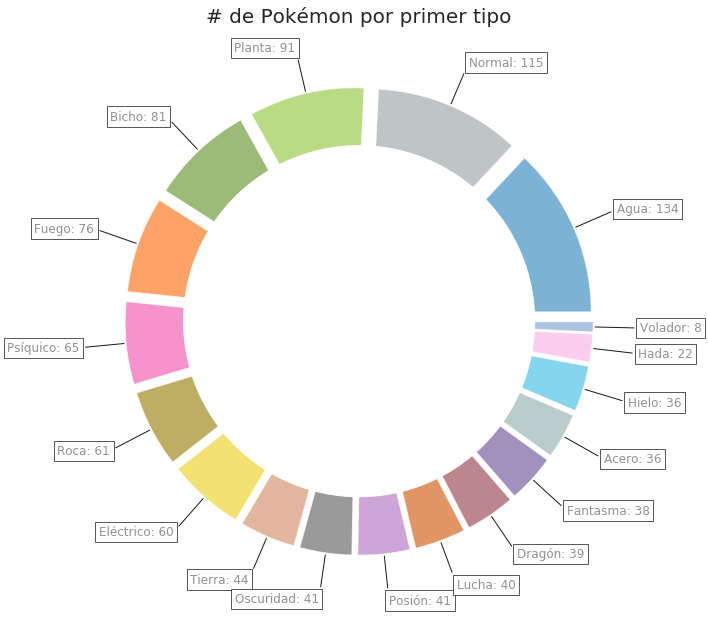

In [224]:
variable = 'Primer_tipo'
tipo1 = df_completo[variable]
tipo1.value_counts()
tamaños1 = [valor for valor in tipo1.value_counts().values]
donut_chart(tamaños1, variable)

- Tipo 2 

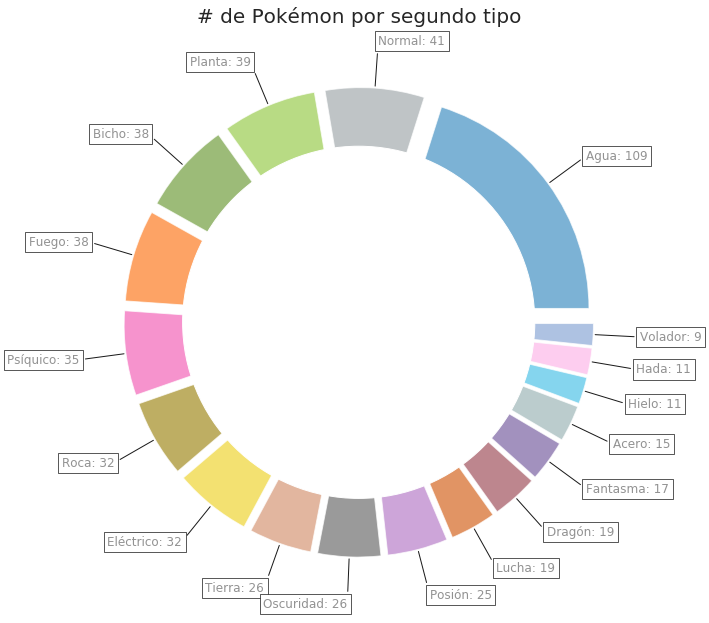

In [225]:
variable = 'Segundo_tipo'
tipo1 = df_completo.Segundo_tipo
tipo1.value_counts()
tamaños1 = [valor for valor in tipo1.value_counts().values]
donut_chart(tamaños1, variable)

## Generación 8

- Datos completos

In [152]:
originales_8 = df_completo[df_completo.Generación.isin([8])]
originales_8.

,pokedex_number,Nombre,Generación,Clasificación,Especie,Número_de_tipos,Primer_tipo,Segundo_tipo,Altura_m,Peso_kg,...,Contra_tierra,Contra_volador,Contra_psíquico,Contra_bicho,Contra_roca,Contra_fantasma,Contra_dragón,Contra_oscuridad,Contra_acero,Contra_hada
940,810,Grookey,8,Normal,Chimp Pokémon,1,Grass,NaN,0.3,5.0,...,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
941,811,Thwackey,8,Normal,Beat Pokémon,1,Grass,NaN,0.7,14.0,...,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
942,812,Rillaboom,8,Normal,Drummer Pokémon,1,Grass,NaN,2.1,90.0,...,0.5,2.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0
943,813,Scorbunny,8,Normal,Rabbit Pokémon,1,Fire,NaN,0.3,4.5,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5
944,814,Raboot,8,Normal,Rabbit Pokémon,1,Fire,NaN,0.6,9.0,...,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


- Disponibles generación 8

In [136]:
gen_8_disponibles = pd.read_csv('../datos/PokeDex8.csv')
gen_8_disponibles

,No.,Name,Ability1,Ability2,Hidden_Ability,Type1,Type2,HP,Att,Def,S.Att,S.Def,Spd,Weight_kg,Height_m,Weight_lbs,Height_ft,Cap_Rate,Egg_Steps,Classification
0,1,Grookey,Overgrow,NaN,Grassy Surge,grass,NaN,50,65,50,40,40,65,5.0,0.3,11.0,1.000,45.0,5120.0,Chimp Pokémon
1,2,Thwackey,Overgrow,NaN,Grassy Surge,grass,NaN,70,85,70,55,60,80,14.0,0.7,30.9,2.333,45.0,5120.0,Beat Pokémon
2,3,Rillaboom,Overgrow,NaN,Grassy Surge,grass,NaN,100,125,90,60,70,85,90.0,2.1,198.4,6.917,45.0,5120.0,Drummer Pokémon
3,4,Scorbunny,Blaze,NaN,Libero,fire,NaN,50,71,40,40,40,69,4.5,0.3,9.9,1.000,45.0,5120.0,Rabbit Pokémon
4,5,Raboot,Blaze,NaN,Libero,fire,NaN,65,86,60,55,60,94,9.0,0.6,19.8,2.000,45.0,5120.0,Rabbit Pokémon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,Drakloak,Clear Body,Infiltrator,Cursed Body,dragon,ghost,68,80,50,60,50,102,11.0,1.4,24.3,4.583,45.0,10240.0,Caretaker Pokémon
396,397,Dragapult,Clear Body,Infiltrator,Cursed Body,dragon,ghost,88,120,75,100,75,142,50.0,3.0,110.2,9.833,45.0,10240.0,Stealth Pokémon
397,398,Zacian,Intrepid Sword,NaN,NaN,fairy,NaN,92,130,115,80,115,138,110.0,2.8,242.5,9.167,10.0,30720.0,Warrior Pokémon
398,399,Zamazenta,Dauntless Shield,NaN,NaN,fighting,NaN,92,130,115,80,115,138,210.0,2.9,463.0,9.500,10.0,30720.0,Warrior Pokémon


Lista de los pokemon disponibles en la generación 8 pero que no son propiamente de dicha generación:

In [153]:
nombres_todos_8 = gen_8_disponibles.Name.values
nombres_8 = originales_8.Nombre.values
lista_no_8 = []
for pkmn_gen8 in nombres_todos_8:
    #print(pkmn_gen8)
    if pkmn_gen8 not in nombres_8:
        lista_no_8.append(pkmn_gen8)
lista_no_8

['Caterpie',
 'Metapod',
 'Butterfree',
 'Grubbin',
 'Charjabug',
 'Vikavolt',
 'Hoothoot',
 'Noctowl',
 'Pidove',
 'Tranquill',
 'Unfezant',
 'Zigzagoon',
 'Linoone',
 'Lotad',
 'Lombre',
 'Ludicolo',
 'Seedot',
 'Nuzleaf',
 'Shiftry',
 'Purrloin',
 'Liepard',
 'Bunnelby',
 'Diggersby',
 'Minccino',
 'Cinccino',
 'Bounsweet',
 'Steenee',
 'Tsareena',
 'Oddish',
 'Gloom',
 'Vileplume',
 'Bellossom',
 'Budew',
 'Roselia',
 'Roserade',
 'Wingull',
 'Pelipper',
 'Joltik',
 'Galvantula',
 'Electrike',
 'Manectric',
 'Vulpix',
 'Ninetales',
 'Growlithe',
 'Arcanine',
 'Vanillite',
 'Vanillish',
 'Vanilluxe',
 'Swinub',
 'Piloswine',
 'Mamoswine',
 'Delibird',
 'Snorunt',
 'Glalie',
 'Froslass',
 'Baltoy',
 'Claydol',
 'Mudbray',
 'Mudsdale',
 'Dwebble',
 'Crustle',
 'Golett',
 'Golurk',
 'Munna',
 'Musharna',
 'Natu',
 'Xatu',
 'Stufful',
 'Bewear',
 'Snover',
 'Abomasnow',
 'Krabby',
 'Kingler',
 'Wooper',
 'Quagsire',
 'Corphish',
 'Crawdaunt',
 'Nincada',
 'Ninjask',
 'Shedinja',
 'Tyrog

Ideas: Checar duplicados, checar las combinaciones posibles para equipos y con últimas evoluciones, checar la generación 8 (el conteo de tipos para saber qué es mejor escoger), graficar el peso y la altura y quizás las estadísticas. Líderes en cada estadística. Regresión lineal, k-vecinos, k-medias, PCA.